In [1]:
import numpy as np
np.random.seed(13)
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import EarlyStopping

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder

In [3]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [4]:
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 128)           100480      input_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 64)            8256        dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 32)            2080        dense_2[0][0]                    
___________________________________________________________________________________________

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s - loss: 0.3296 - val_loss: 0.2628
Epoch 2/100
60000/60000 [==============================] - 0s - loss: 0.2551 - val_loss: 0.2460
Epoch 3/100
60000/60000 [==============================] - 0s - loss: 0.2396 - val_loss: 0.2306
Epoch 4/100
60000/60000 [==============================] - 0s - loss: 0.2256 - val_loss: 0.2194
Epoch 5/100
60000/60000 [==============================] - 0s - loss: 0.2123 - val_loss: 0.2046
Epoch 6/100
60000/60000 [==============================] - 0s - loss: 0.2019 - val_loss: 0.1977
Epoch 7/100
60000/60000 [==============================] - 0s - loss: 0.1934 - val_loss: 0.1876
Epoch 8/100
60000/60000 [==============================] - 0s - loss: 0.1837 - val_loss: 0.1793
Epoch 9/100
60000/60000 [==============================] - 0s - loss: 0.1763 - val_loss: 0.1737
Epoch 10/100
60000/60000 [==============================] - 0s - loss: 0.1706 - val_lo

In [16]:
encoder = Model(input=input_img, output=encoded)

encoded_input = Input(shape=(32,))

In [31]:
autoencoder.layers[4]

In [33]:
decoder_layer = autoencoder.layers[4](encoded_input)
decoder_layer2=autoencoder.layers[5](decoder_layer)
decoder_layer3=autoencoder.layers[6](decoder_layer2)
decoder = Model(input=encoded_input, output=decoder_layer3)

In [20]:
encoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 128)           100480      input_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 64)            8256        dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 32)            2080        dense_2[0][0]                    
Total params: 110816
______________________________________________________________________

In [34]:
decoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 32)            0                                            
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 64)            2112        input_5[0][0]                    
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 128)           8320        dense_4[4][0]                    
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 784)           101136      dense_5[1][0]                    
Total params: 111568
______________________________________________________________________

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

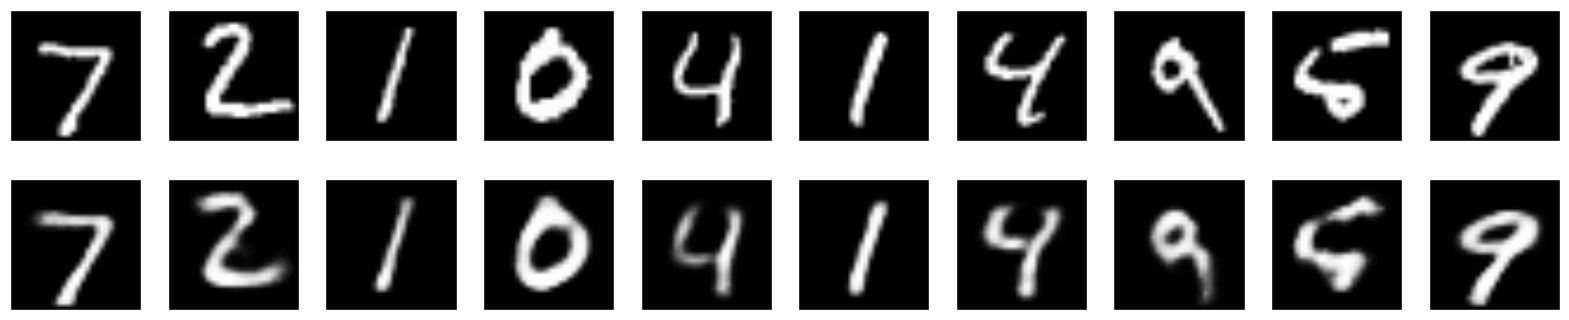

In [36]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

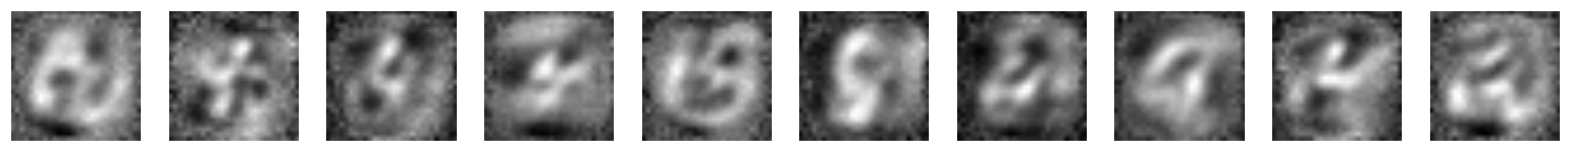

In [37]:
encoded_imgs = np.random.rand(10,32)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # generation
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()